In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_NIR_1.csv")

# Define the target variable and numeric columns
target = 'tgp_name'
numeric_cols_df_0 = df_0.select_dtypes(include=[np.number]).columns.tolist()
string_cols_df_0 = df_0.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop non-numeric columns and target column from numeric columns list
numeric_cols_df_0 = [col for col in numeric_cols_df_0 if col not in string_cols_df_0]


In [3]:
# Specify the wavenumber regions to focus on
focus_regions = [
    (4641, 4681), (4867, 5510), (5657, 5826), (7057, 7097),
    (7169, 7209), (8238, 8278)
]

# Convert column names to float where possible
numeric_cols_df_0_float = []
for col in numeric_cols_df_0:
    try:
        numeric_cols_df_0_float.append(float(col))
    except ValueError:
        pass  # Ignore columns that cannot be converted to float

# Flatten the list of regions to get all columns in the specified regions
columns_to_focus = []
for start, end in focus_regions:
    columns_to_focus.extend([col for col in numeric_cols_df_0_float if start <= col <= end])

# Convert back to string for DataFrame indexing and ensure columns are present in the DataFrame
columns_to_focus = [str(col) for col in columns_to_focus if str(col) in df_0.columns]

# Display the selected columns to focus
columns_to_focus

[]

In [4]:
# Inspect the range of the numeric columns
numeric_col_ranges = [float(col) for col in numeric_cols_df_0]
min_col = min(numeric_col_ranges)
max_col = max(numeric_col_ranges)

min_col, max_col


(3952.0, 11544.0)

In [5]:
# Redefine the focus regions to cover the dataset's range
focus_regions = [
    (3952, 11544)  # Covering the entire range of numeric columns
]

# Flatten the list of regions to get all columns in the specified regions
columns_to_focus = []
for start, end in focus_regions:
    columns_to_focus.extend([col for col in numeric_cols_df_0_float if start <= col <= end])

# Convert back to string for DataFrame indexing and ensure columns are present in the DataFrame
columns_to_focus = [str(col) for col in columns_to_focus if str(col) in df_0.columns]

# Display the selected columns to focus
columns_to_focus


[]

In [6]:
# Print the first few column names to inspect their formats
df_0.columns[:50]


Index(['prov_char', 'country_char', 'wavenumber', '11544', '11540', '11536',
       '11532', '11528', '11524', '11520', '11516', '11512', '11508', '11504',
       '11500', '11496', '11492', '11488', '11484', '11480', '11476', '11472',
       '11468', '11464', '11460', '11456', '11452', '11448', '11444', '11440',
       '11436', '11432', '11428', '11424', '11420', '11416', '11412', '11408',
       '11404', '11400', '11396', '11392', '11388', '11384', '11380', '11376',
       '11372', '11368', '11364', '11360'],
      dtype='object')

In [7]:
# Define the focus regions to cover the dataset's range
focus_regions = [
    (4641, 4681), (4867, 5510), (5657, 5826), (7057, 7097),
    (7169, 7209), (8238, 8278)
]

# Convert column names to float where possible and filter based on focus regions
columns_to_focus = []
for col in numeric_cols_df_0:
    try:
        col_float = float(col)
        if any(start <= col_float <= end for start, end in focus_regions):
            columns_to_focus.append(col)
    except ValueError:
        pass  # Ignore columns that cannot be converted to float

# Display the selected columns to focus
columns_to_focus


['8276',
 '8272',
 '8268',
 '8264',
 '8260',
 '8256',
 '8252',
 '8248',
 '8244',
 '8240',
 '7208',
 '7204',
 '7200',
 '7196',
 '7192',
 '7188',
 '7184',
 '7180',
 '7176',
 '7172',
 '7096',
 '7092',
 '7088',
 '7084',
 '7080',
 '7076',
 '7072',
 '7068',
 '7064',
 '7060',
 '5824',
 '5820',
 '5816',
 '5812',
 '5808',
 '5804',
 '5800',
 '5796',
 '5792',
 '5788',
 '5784',
 '5780',
 '5776',
 '5772',
 '5768',
 '5764',
 '5760',
 '5756',
 '5752',
 '5748',
 '5744',
 '5740',
 '5736',
 '5732',
 '5728',
 '5724',
 '5720',
 '5716',
 '5712',
 '5708',
 '5704',
 '5700',
 '5696',
 '5692',
 '5688',
 '5684',
 '5680',
 '5676',
 '5672',
 '5668',
 '5664',
 '5660',
 '5508',
 '5504',
 '5500',
 '5496',
 '5492',
 '5488',
 '5484',
 '5480',
 '5476',
 '5472',
 '5468',
 '5464',
 '5460',
 '5456',
 '5452',
 '5448',
 '5444',
 '5440',
 '5436',
 '5432',
 '5428',
 '5424',
 '5420',
 '5416',
 '5412',
 '5408',
 '5404',
 '5400',
 '5396',
 '5392',
 '5388',
 '5384',
 '5380',
 '5376',
 '5372',
 '5368',
 '5364',
 '5360',
 '5356',
 

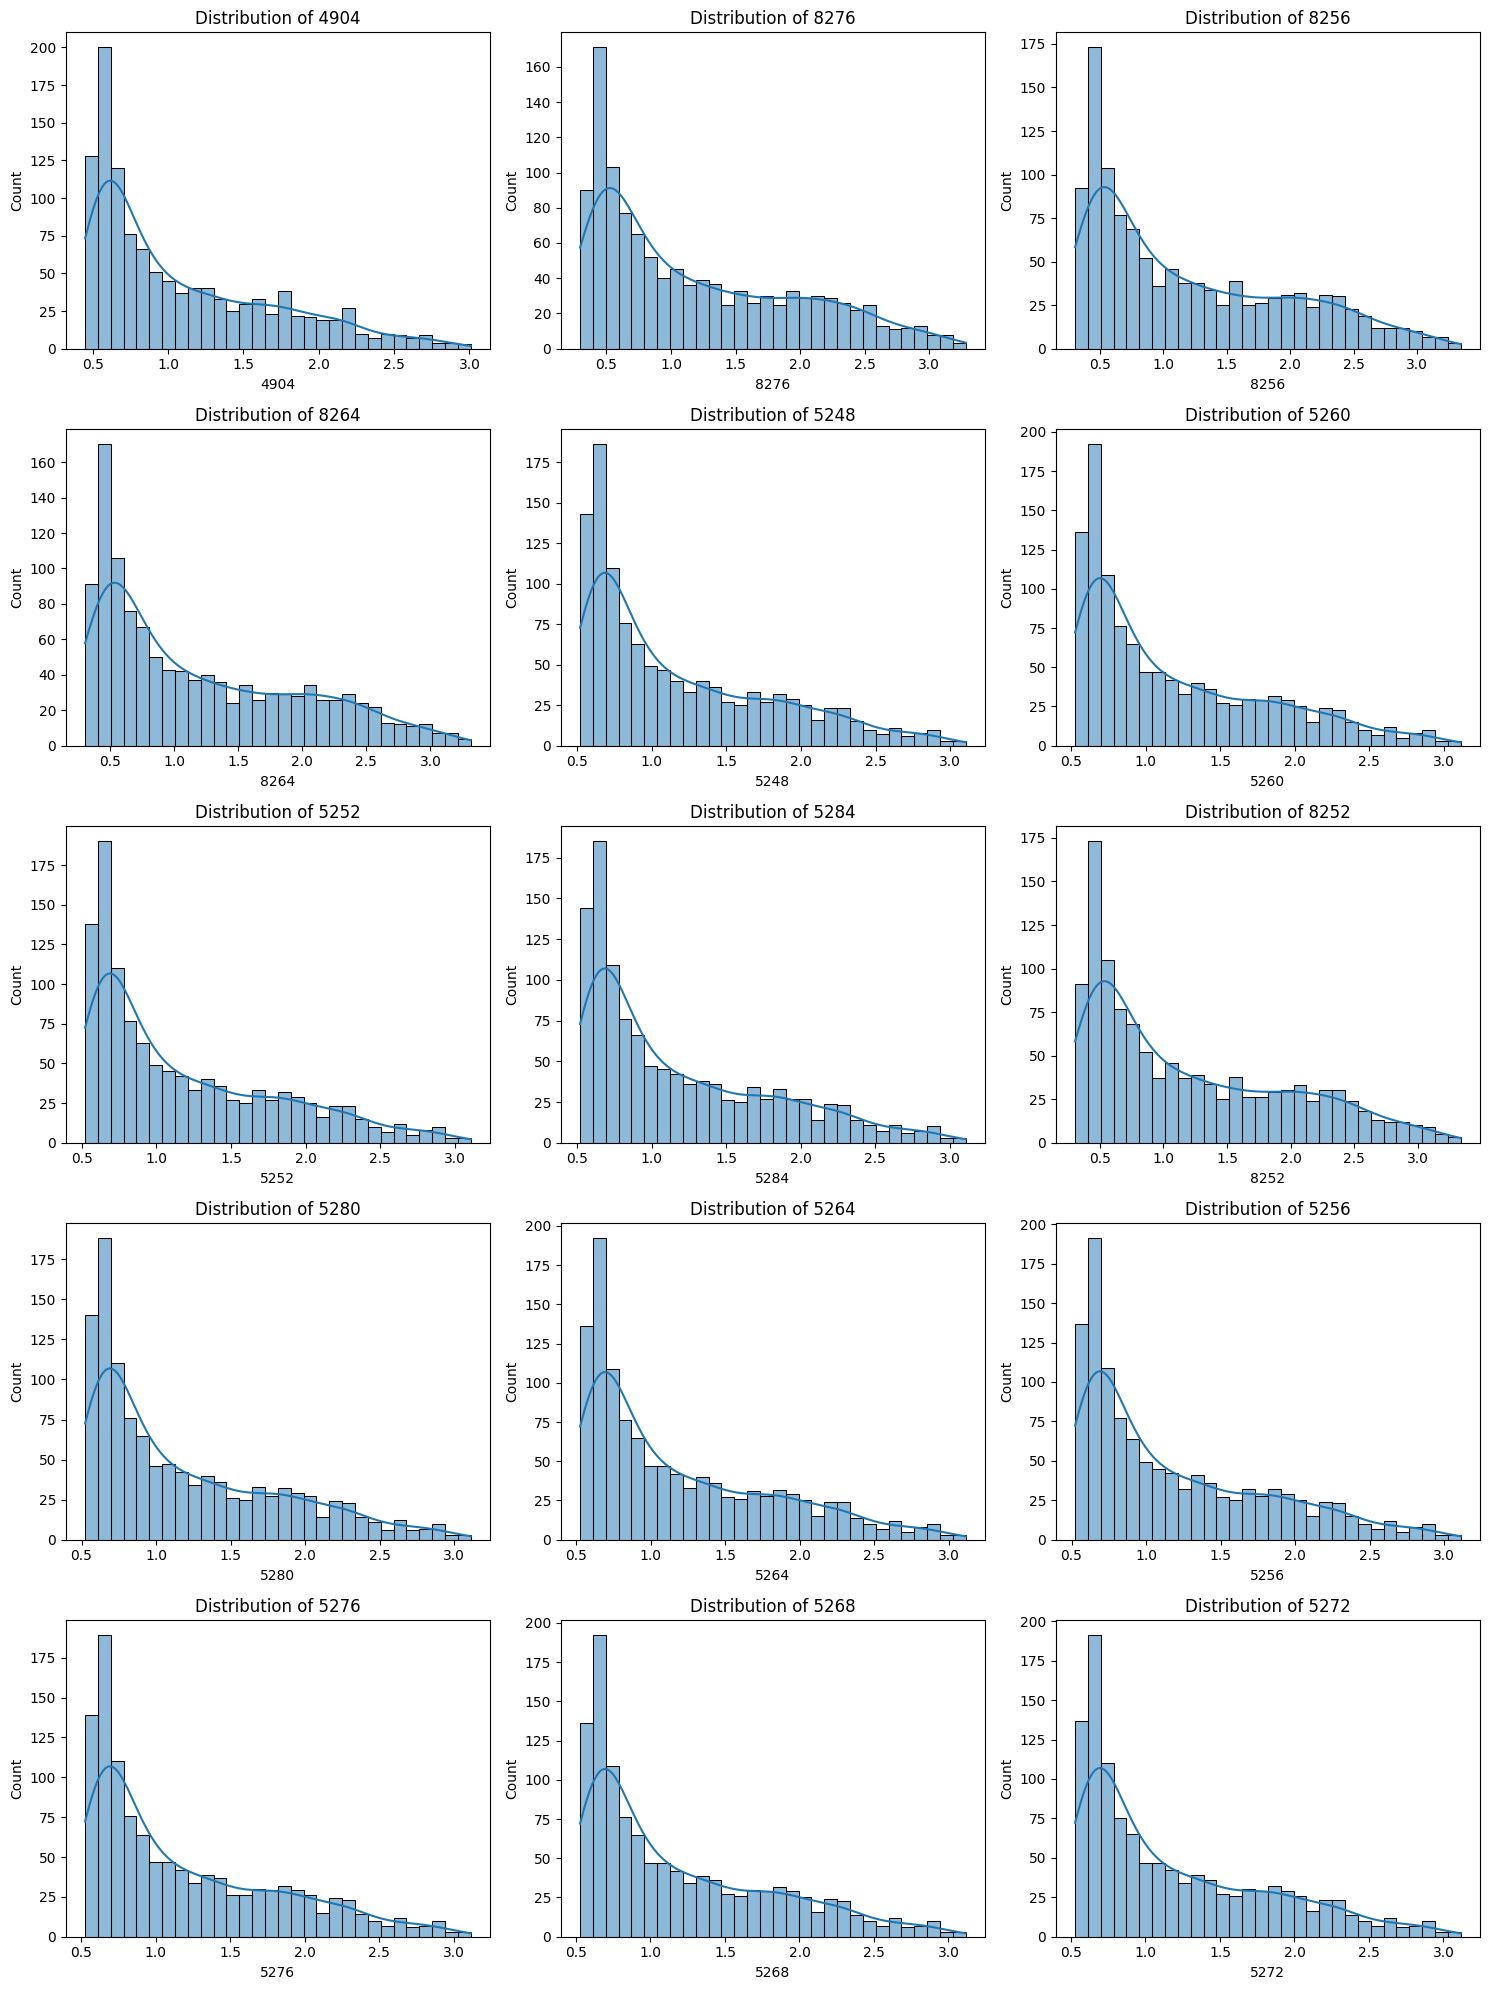

In [8]:
# Train a RandomForest model to get feature importances
X = df_0[columns_to_focus]
y = df_0[target]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features

# Plot the distribution of the top 15 most important features
plt.figure(figsize=(15, 20))
for i, idx in enumerate(indices):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df_0[columns_to_focus[idx]], bins=30, kde=True)
    plt.title(f'Distribution of {columns_to_focus[idx]}')
plt.tight_layout()
plt.show()


In [9]:
# Define a function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(stats.zscore(df[columns]))
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers from the top 15 important features
top_features = [columns_to_focus[idx] for idx in indices]
df_0_cleaned = remove_outliers_zscore(df_0, top_features)

# Check the shape of the cleaned dataframe
print("Original Data Shape:", df_0.shape)
print("Cleaned Data Shape:", df_0_cleaned.shape)


Original Data Shape: (1156, 1907)
Cleaned Data Shape: (1153, 1907)


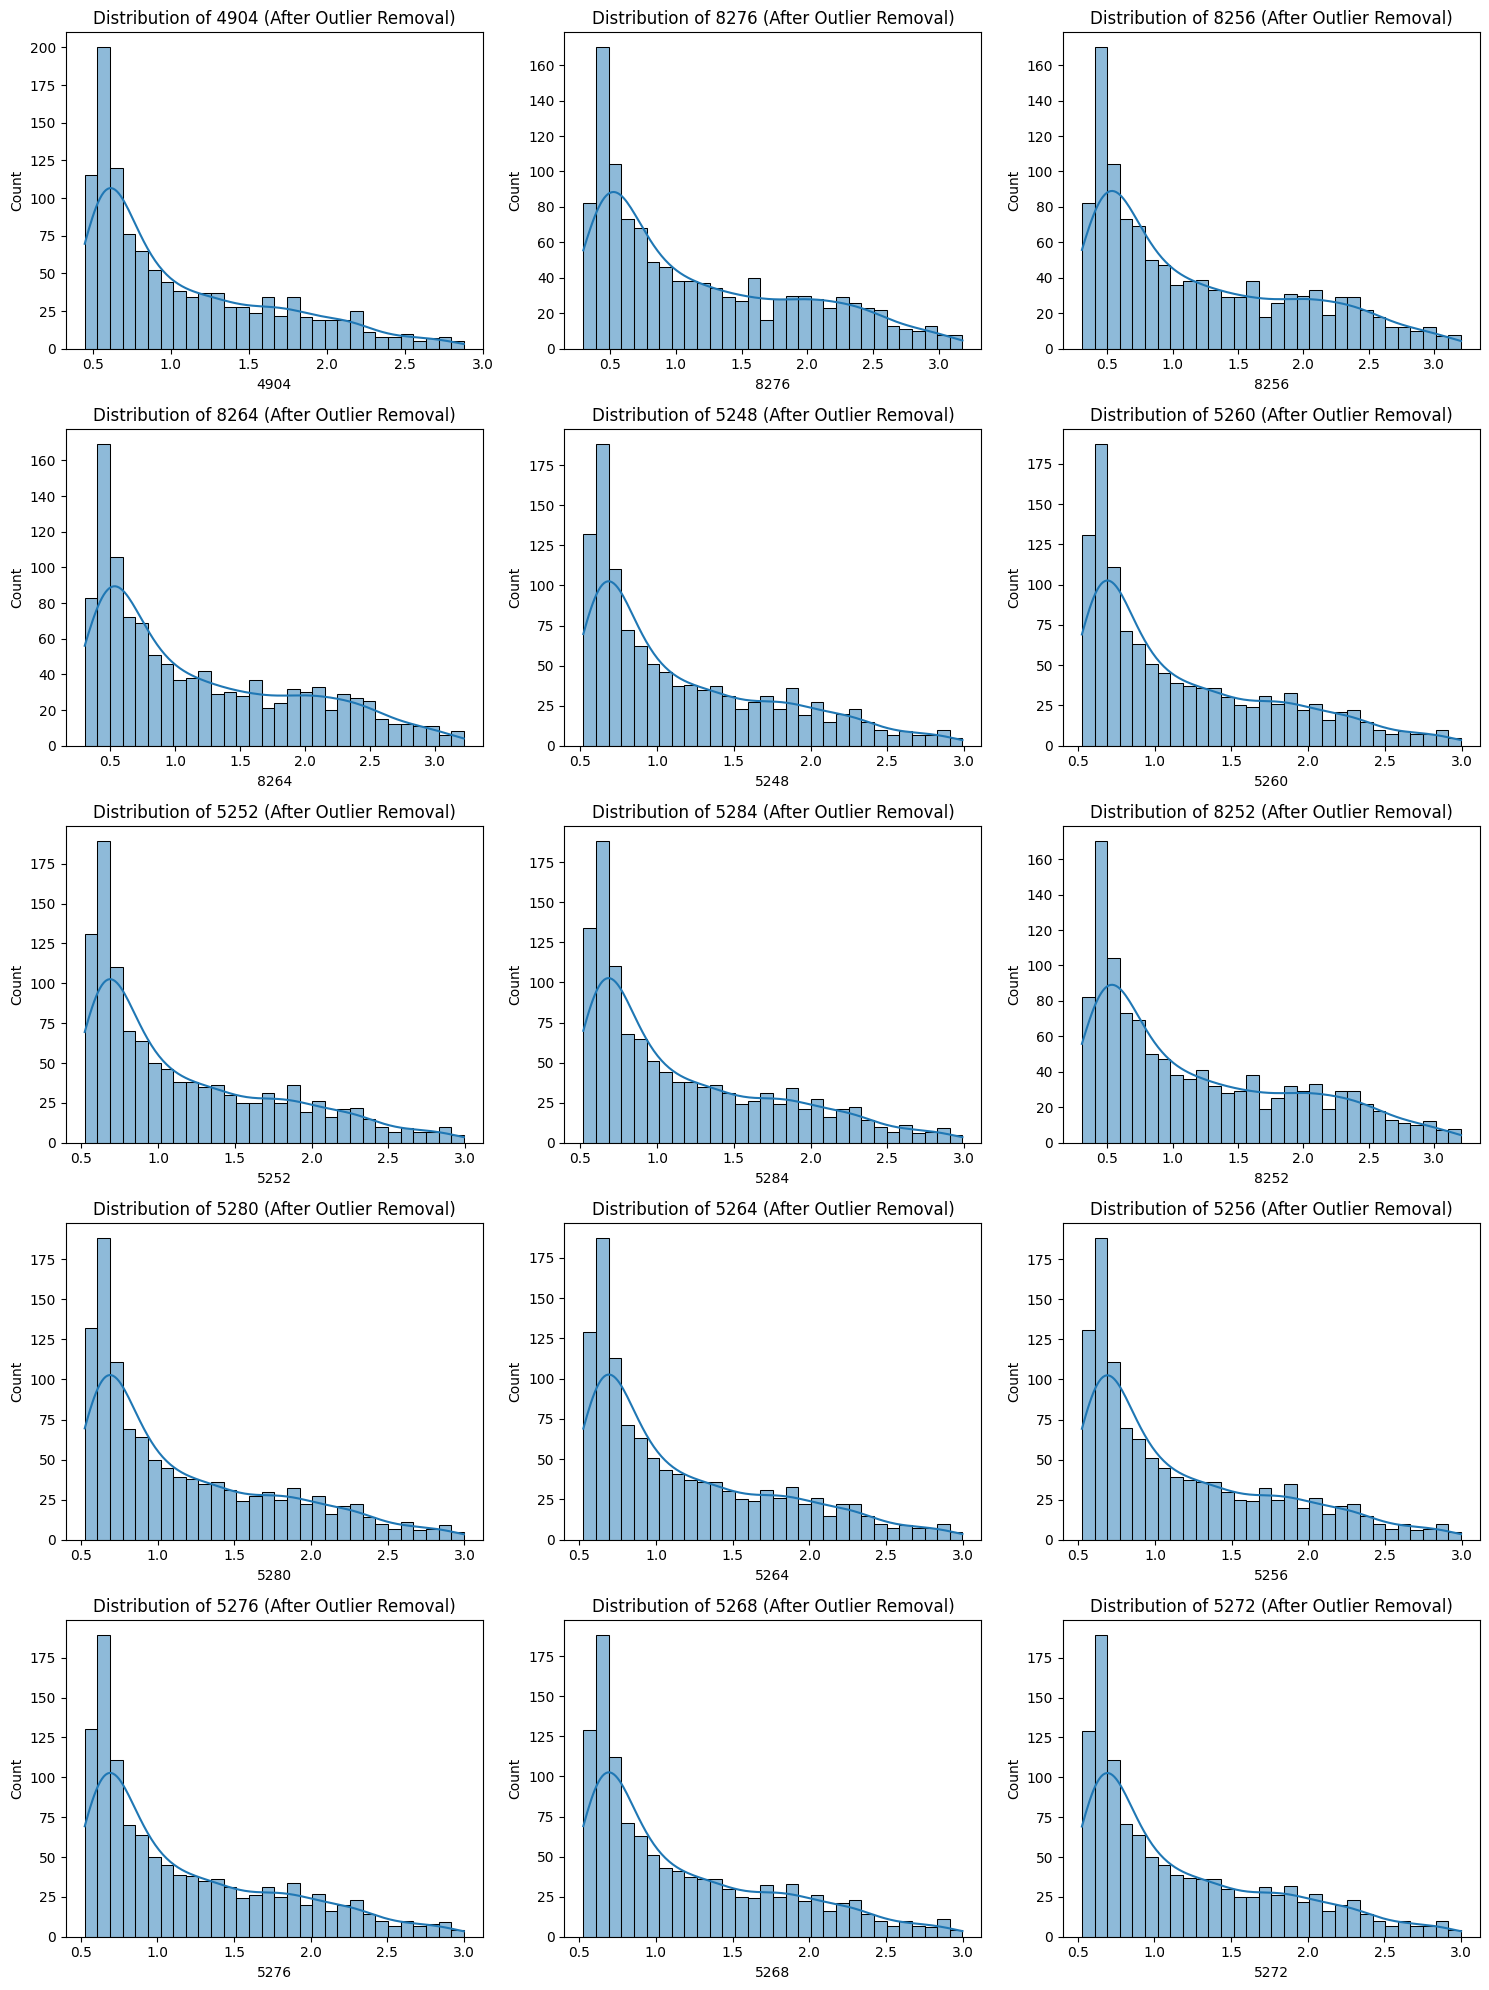

In [10]:
# Plot the distribution of the top 15 most important features after outlier removal
plt.figure(figsize=(15, 20))
for i, feature in enumerate(top_features):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df_0_cleaned[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} (After Outlier Removal)')
plt.tight_layout()
plt.show()


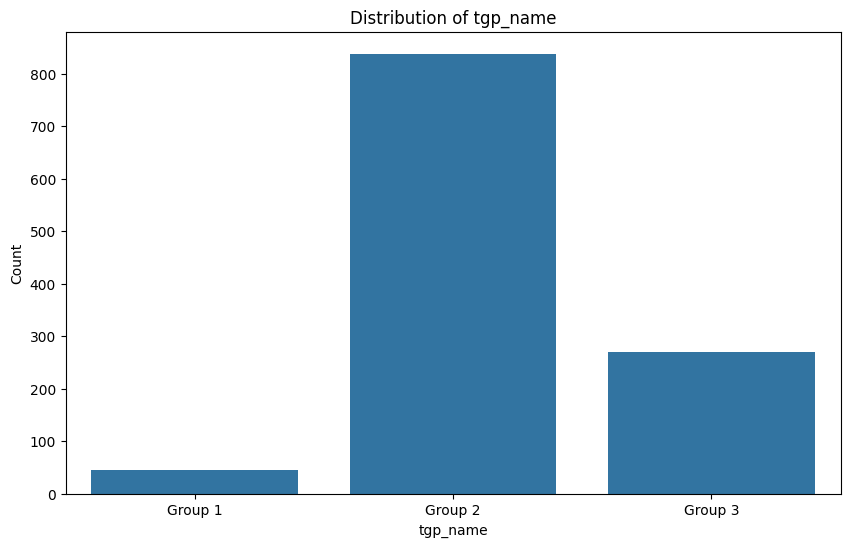

In [11]:
# Create a distribution plot for 'tgp_name'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_0_cleaned, x=target)
plt.title('Distribution of tgp_name')
plt.xlabel('tgp_name')
plt.ylabel('Count')
plt.show()


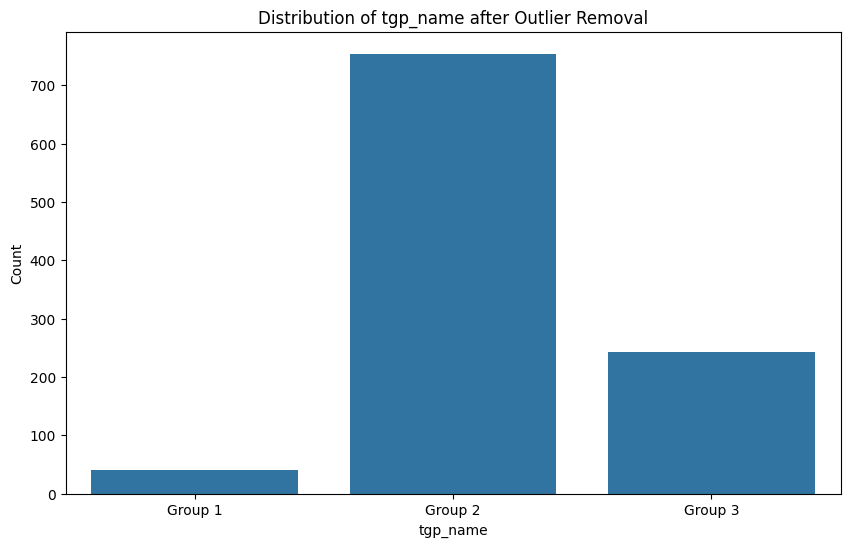

New distribution of tgp_name:
tgp_name
Group 2    754
Group 3    243
Group 1     40
Name: count, dtype: int64


In [12]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)

# Separate samples by 'tgp_name'
df_0_cleaned_group_1 = df_0_cleaned[df_0_cleaned[target] == 'Group 1']
df_0_cleaned_group_2 = df_0_cleaned[df_0_cleaned[target] == 'Group 2']
df_0_cleaned_group_3 = df_0_cleaned[df_0_cleaned[target] == 'Group 3']

# Apply Isolation Forest to each group
def remove_outliers_iso(df, numeric_cols):
    yhat = iso.fit_predict(df[numeric_cols])
    mask = yhat != -1
    return df[mask]

df_0_cleaned_group_1_cleaned = remove_outliers_iso(df_0_cleaned_group_1, numeric_cols_df_0)
df_0_cleaned_group_2_cleaned = remove_outliers_iso(df_0_cleaned_group_2, numeric_cols_df_0)
df_0_cleaned_group_3_cleaned = remove_outliers_iso(df_0_cleaned_group_3, numeric_cols_df_0)

# Combine cleaned groups
df_1_cleaned = pd.concat([df_0_cleaned_group_1_cleaned, df_0_cleaned_group_2_cleaned, df_0_cleaned_group_3_cleaned], axis=0).reset_index(drop=True)

# Plot the distribution of tgp_name after outlier removal
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1_cleaned, x=target)
plt.title('Distribution of tgp_name after Outlier Removal')
plt.xlabel('tgp_name')
plt.ylabel('Count')
plt.show()

# Verify the new distribution
print("New distribution of tgp_name:")
print(df_1_cleaned[target].value_counts())


tgp_name
Group 1    40
Group 2    40
Group 3    40
Name: count, dtype: int64


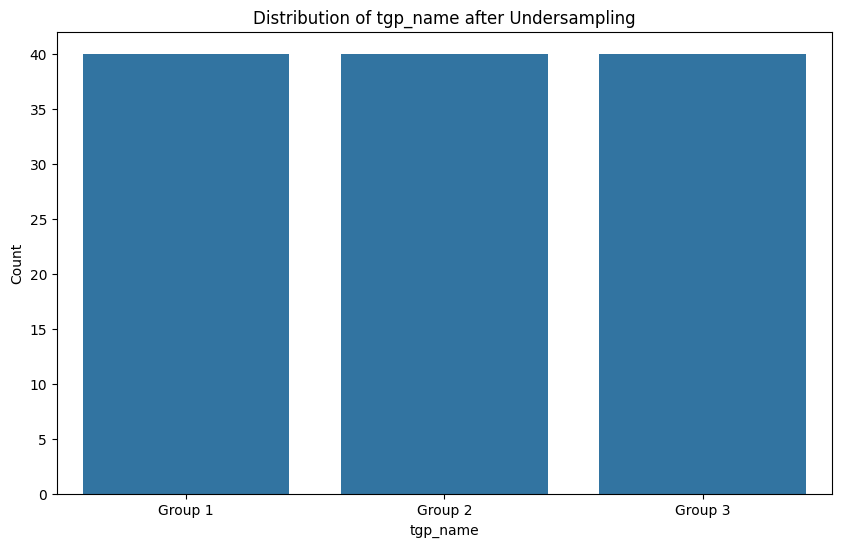

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

# Encoding the 'tgp_name' column
le = LabelEncoder()
df_1_cleaned['tgp_name_encoded'] = le.fit_transform(df_1_cleaned['tgp_name'])

# Define the target variable and numeric columns
numeric_cols_df_1 = df_1_cleaned.select_dtypes(include=[np.number]).columns.tolist()
string_cols_df_1 = df_1_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop non-numeric columns and target column from numeric columns list
numeric_cols_df_1 = [col for col in numeric_cols_df_1 if col not in string_cols_df_1]

# Define features and target
X_df_1 = df_1_cleaned[numeric_cols_df_1].drop(columns=['tgp_name_encoded'])
y_df_1 = df_1_cleaned['tgp_name_encoded'].values

# Determine the size of the smallest group
min_size = df_1_cleaned['tgp_name'].value_counts().min()

# Create the sampling strategy dictionary
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
sampling_strategy = {label_mapping[key]: min_size for key in label_mapping}

# Apply undersampling
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_df_1_balanced, y_df_1_balanced = rus.fit_resample(X_df_1, y_df_1)

# Display the new distribution of 'tgp_name'
balanced_df = df_1_cleaned.iloc[rus.sample_indices_]
tgp_name_distribution = balanced_df['tgp_name'].value_counts()
print(tgp_name_distribution)

# Check the distribution of 'tgp_name' after undersampling
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='tgp_name')
plt.title('Distribution of tgp_name after Undersampling')
plt.xlabel('tgp_name')
plt.ylabel('Count')
plt.show()


Mean Accuracy: 0.15660126910126912
Left out group: ['BBX'], Accuracy: 0.0
Left out group: ['CBI'], Accuracy: 0.3125
Left out group: ['CCO'], Accuracy: 0.2777777777777778
Left out group: ['CPN'], Accuracy: 0.125
Left out group: ['KAX'], Accuracy: 0.0
Left out group: ['KBI'], Accuracy: 0.0
Left out group: ['KBX'], Accuracy: 0.07692307692307693
Left out group: ['KTX'], Accuracy: 0.0
Left out group: ['NRT'], Accuracy: 0.0
Left out group: ['NWT'], Accuracy: 0.5
Left out group: ['RIX'], Accuracy: 0.375
Left out group: ['SNI'], Accuracy: 0.18181818181818182
Left out group: ['SNK'], Accuracy: 0.0
Left out group: ['SUX'], Accuracy: 0.5
Left out group: ['TRG'], Accuracy: 0.0


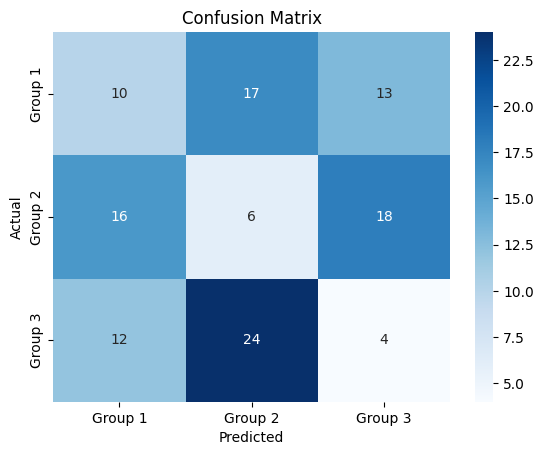

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut

# Initialize and encode the 'prov_char' column
le_prov = LabelEncoder()
prov_char_encoded = le_prov.fit_transform(balanced_df['prov_char'])

# Define features and target for the balanced dataset
X_balanced = balanced_df.drop(columns=['tgp_name', 'tgp_name_encoded'])
y_balanced = balanced_df['tgp_name_encoded'].values

# Ensure X_balanced contains only numeric columns
X_balanced = X_balanced.select_dtypes(include=[np.number])

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Arrays to store results
accuracies = []
left_out_groups = []
all_y_test = []
all_y_pred = []

# Perform LOGO-CV
for train_idx, test_idx in logo.split(X_balanced, y_balanced, groups=prov_char_encoded):
    X_train, X_test = X_balanced.iloc[train_idx], X_balanced.iloc[test_idx]
    y_train, y_test = y_balanced[train_idx], y_balanced[test_idx]
    
    # Train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    accuracies.append(accuracy)
    left_out_groups.append(balanced_df['prov_char'].iloc[test_idx].unique())
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')

# Display left out groups and their accuracies
for group, acc in zip(left_out_groups, accuracies):
    print(f'Left out group: {group}, Accuracy: {acc}')

# Generate confusion matrix
conf_matrix = confusion_matrix(all_y_test, all_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
